In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Importing Data

In [18]:
dataset=pd.read_csv("Position_Salaries.csv")
print(dataset)
X=dataset.iloc[:,1:-1].values
y=dataset.iloc[:,-1:].values #[:,-1:]-->Returns 2D array, [:,-1] --> Returns 1D array
print(X)
print(y)

#Feature Scaling(StandardScaler) expect 2D as input. so converting 1D to 2D as below
#y=y.reshape(len(y),1)#reshape(no.of row, no. of column)
#print(y)

            Position  Level   Salary
0   Business Analyst      1    45000
1  Junior Consultant      2    50000
2  Senior Consultant      3    60000
3            Manager      4    80000
4    Country Manager      5   110000
5     Region Manager      6   150000
6            Partner      7   200000
7     Senior Partner      8   300000
8            C-level      9   500000
9                CEO     10  1000000
[[ 1]
 [ 2]
 [ 3]
 [ 4]
 [ 5]
 [ 6]
 [ 7]
 [ 8]
 [ 9]
 [10]]
[[  45000]
 [  50000]
 [  60000]
 [  80000]
 [ 110000]
 [ 150000]
 [ 200000]
 [ 300000]
 [ 500000]
 [1000000]]


# Feature Scaling

In [12]:
# Feature scaling is applied in SVR since v don't have coefficient as in Linear (or) polynomial regression
# Feature Scaling - x represents independent data set
# Standardisation--> x-mean(x)/standard deviation(x) --> Range (-3 to +3)
from sklearn.preprocessing import StandardScaler
sc_X=StandardScaler()
X=sc_X.fit_transform(X)
sc_y=StandardScaler()
y=sc_y.fit_transform(y)
print(X)
print(y)

[[-1.5666989 ]
 [-1.21854359]
 [-0.87038828]
 [-0.52223297]
 [-0.17407766]
 [ 0.17407766]
 [ 0.52223297]
 [ 0.87038828]
 [ 1.21854359]
 [ 1.5666989 ]]
[[-0.72004253]
 [-0.70243757]
 [-0.66722767]
 [-0.59680786]
 [-0.49117815]
 [-0.35033854]
 [-0.17428902]
 [ 0.17781001]
 [ 0.88200808]
 [ 2.64250325]]


# Training SVR on whole dataset

In [13]:
from sklearn.svm import SVR
regressor=SVR(kernel='rbf')
regressor.fit(X,y)

/home/vinoth/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


SVR()

# Predicting a new result

In [14]:
# inverse_transform-Convert scaled value back to actual value. sc_X.transform-tranform actual to scaled value
# We are ignoring level 10(CEO) which has huge deviation than other points.
sc_y.inverse_transform(regressor.predict(sc_X.transform([[6.5]])))

array([170370.0204065])

In [15]:
sc_y.inverse_transform(regressor.predict(sc_X.transform([[10]])))

array([557821.75899897])

# Visualising SVR results

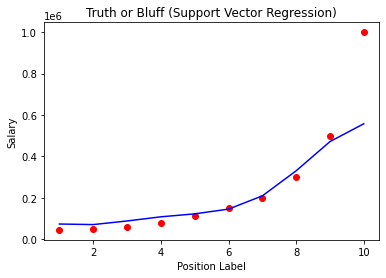

In [16]:
# inverse_transform should be applied to X and y to Convert scaled value back to actual value
# SVR ignores level 10 since it doesn't fit boundary(decision boundary)
# Regression line is called Hyperplane and its surrounded by decision boundary - decision boundary
# https://www.analyticsvidhya.com/blog/2020/03/support-vector-regression-tutorial-for-machine-learning/
plt.scatter(sc_X.inverse_transform(X),sc_y.inverse_transform(y),color="red")
plt.plot(sc_X.inverse_transform(X), sc_y.inverse_transform(regressor.predict(X)), color="blue")
plt.title("Truth or Bluff (Support Vector Regression)")
plt.xlabel("Position Label")
plt.ylabel("Salary")
plt.show()

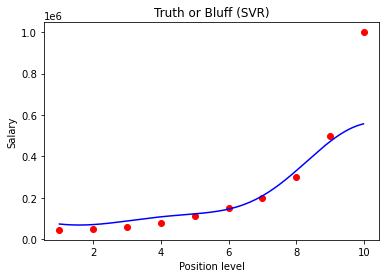

In [17]:
X_grid = np.arange(min(sc_X.inverse_transform(X)), max(sc_X.inverse_transform(X)), 0.01) 
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(sc_X.inverse_transform(X),sc_y.inverse_transform(y),color="red")#this step required because data is feature scaled.
plt.plot(X_grid, sc_y.inverse_transform(regressor.predict(sc_X.transform(X_grid))), color="blue")
plt.title('Truth or Bluff (SVR)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()